# Asteroides Diameter Predictor

## Import Necessary Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 50) # To see all the columns of dataset

## Import DataSet

In [3]:
dataset = pd.read_csv('Clean_Dataset.csv')  # To Read dataset
dataset.head()

,Unnamed: 0,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,moid,class,n,per,ma,Diameter
0,0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002.0,11.85,N,N,1.59478,MBA,0.213885,1683.145708,77.372096,10.2
1,1,2.772466,0.230337,26.665712,173.080063,310.048857,2.133865,3.411067,4.616444,14881.5,0,2137.5,11.85,N,N,1.23324,MBA,0.213503,1686.155999,59.699133,10.2
2,2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,14881.5,0,2137.5,11.85,N,N,1.03454,MBA,0.226019,1592.787285,34.925016,10.2
3,3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,14881.5,0,2137.5,11.85,N,N,1.13948,MBA,0.271609,1325.432765,95.861936,10.2
4,4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,14881.5,0,2137.5,11.85,N,N,1.09589,MBA,0.238632,1508.600458,282.366289,10.2


In [4]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,moid,class,n,per,ma,Diameter
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002.0,11.85,N,N,1.59478,MBA,0.213885,1683.145708,77.372096,10.2
1,2.772466,0.230337,26.665712,173.080063,310.048857,2.133865,3.411067,4.616444,14881.5,0,2137.5,11.85,N,N,1.23324,MBA,0.213503,1686.155999,59.699133,10.2
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,14881.5,0,2137.5,11.85,N,N,1.03454,MBA,0.226019,1592.787285,34.925016,10.2
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,14881.5,0,2137.5,11.85,N,N,1.13948,MBA,0.271609,1325.432765,95.861936,10.2
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,14881.5,0,2137.5,11.85,N,N,1.09589,MBA,0.238632,1508.600458,282.366289,10.2


In [5]:
# Segregate Data into numeric and categorical onces
categorical, numeric = [], []
for ele in dataset.columns:
    if dataset[ele].dtype == 'object':
        categorical.append(ele)
    else:
        numeric.append(ele)
print("Categorical Data : ", categorical)
print("Numeric Data : ", numeric)

Categorical Data :  ['neo', 'pha', 'class']
Numeric Data :  ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'moid', 'n', 'per', 'ma', 'Diameter']


In [6]:
dataset.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,moid,class,n,per,ma,Diameter
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002.0,11.85,N,N,1.59478,MBA,0.213885,1683.145708,77.372096,10.2
1,2.772466,0.230337,26.665712,173.080063,310.048857,2.133865,3.411067,4.616444,14881.5,0,2137.5,11.85,N,N,1.23324,MBA,0.213503,1686.155999,59.699133,10.2
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,14881.5,0,2137.5,11.85,N,N,1.03454,MBA,0.226019,1592.787285,34.925016,10.2
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,14881.5,0,2137.5,11.85,N,N,1.13948,MBA,0.271609,1325.432765,95.861936,10.2
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,14881.5,0,2137.5,11.85,N,N,1.09589,MBA,0.238632,1508.600458,282.366289,10.2


## Check for MultiCollinearity

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
#Calculating VIF
def cal_vif(X):

    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

In [9]:
vif = cal_vif(dataset.drop(['neo', 'pha', 'class'], axis=1))

In [10]:
def conv_int(x):
    try:
        x = int(x)
        return x
    except:
        return x

In [11]:
vif['VIF'] = vif['VIF'].apply(lambda x: conv_int(x))
vif

,variables,VIF
0,a,46080.0
1,e,125.0
2,i,6.0
3,om,3.0
4,w,4.0
5,q,13356.0
6,ad,4899.0
7,per_y,inf
8,data_arc,20.0
9,condition_code,1.0


From Variable Inflation Factor we can conclude that multicollinearity exists

In [12]:
# Droping 'per_y' and 'a' due to multicollinearity
dataset.drop(['per_y', 'a'], axis=1, inplace=True)

## Converting Categorical Data into Numeric

### Creating Dummy Variables

In [13]:
print("Categorical Data : ",categorical)

Categorical Data :  ['neo', 'pha', 'class']


In [14]:
neo_dummy = pd.get_dummies(dataset['neo'], drop_first=True)
neo_dummy.head()

,Y
0,0
1,0
2,0
3,0
4,0


In [15]:
pha_dummy = pd.get_dummies(dataset['pha'], drop_first=True)
pha_dummy.head()

,Y
0,0
1,0
2,0
3,0
4,0


In [16]:
class_dummy = pd.get_dummies(dataset['class'], drop_first=True)
class_dummy.head()

,APO,AST,ATE,CEN,IMB,MBA,MCA,OMB,TJN,TNO
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0


In [17]:
new_data = pd.concat([dataset, neo_dummy, pha_dummy, class_dummy], axis=1)
new_data.drop(['neo', 'pha', 'class'], axis=1, inplace=True)
new_data.head()

,e,i,om,w,q,ad,data_arc,condition_code,n_obs_used,H,moid,n,per,ma,Diameter,Y,Y,APO,AST,ATE,CEN,IMB,MBA,MCA,OMB,TJN,TNO
0,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,8822.0,0,1002.0,11.85,1.59478,0.213885,1683.145708,77.372096,10.2,0,0,0,0,0,0,0,1,0,0,0,0
1,0.230337,26.665712,173.080063,310.048857,2.133865,3.411067,14881.5,0,2137.5,11.85,1.23324,0.213503,1686.155999,59.699133,10.2,0,0,0,0,0,0,0,1,0,0,0,0
2,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,14881.5,0,2137.5,11.85,1.03454,0.226019,1592.787285,34.925016,10.2,0,0,0,0,0,0,0,1,0,0,0,0
3,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,14881.5,0,2137.5,11.85,1.13948,0.271609,1325.432765,95.861936,10.2,0,0,0,0,0,0,0,1,0,0,0,0
4,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,14881.5,0,2137.5,11.85,1.09589,0.238632,1508.600458,282.366289,10.2,0,0,0,0,0,0,0,1,0,0,0,0


## Split Data into Train and Test Data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data.drop('Diameter', axis=1), new_data['Diameter'], test_size=0.15, random_state=1)

## Scaling the Data

In [27]:
from sklearn.preprocessing import MinMaxScaler
mm_scale = MinMaxScaler()
X_train = mm_scale.fit_transform(X_train)
X_test = mm_scale.transform(X_test)

## Evaluation 

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [31]:
def evaluate(y_pred, y_actual):
    mae = round(mean_absolute_error(y_actual, y_pred), 4)
    mse = round(mean_squared_error(y_actual, y_pred), 4)
    rmse = round(sqrt(mse), 4)
    r2 = round(r2_score(y_actual, y_pred), 4)

    print("Mean Absolute Error :-> ", mae)
    print("Mean Squared Error :-> ", mse)
    print("Root Mean Squared Error :-> ", rmse)
    print("R-Square :-> ", r2)

    return mae, mse, rmse, r2

## Applying Algorithms

In [23]:
algo_score = {}     # For Storing Algoriths name and its performance

### CatBoost Regressor

In [28]:
from catboost import CatBoostRegressor
cbr = CatBoostRegressor(loss_function='RMSE', iterations=10000)
cbr.fit(X_train, y_train)

Learning rate set to 0.013364
0:	learn: 2.3956442	total: 34.6ms	remaining: 5m 46s
1:	learn: 2.3726114	total: 52.7ms	remaining: 4m 23s
2:	learn: 2.3498102	total: 71.4ms	remaining: 3m 57s
3:	learn: 2.3274578	total: 88.8ms	remaining: 3m 41s
4:	learn: 2.3052768	total: 107ms	remaining: 3m 34s
5:	learn: 2.2835993	total: 125ms	remaining: 3m 28s
6:	learn: 2.2623645	total: 143ms	remaining: 3m 23s
7:	learn: 2.2415335	total: 163ms	remaining: 3m 23s
8:	learn: 2.2209401	total: 184ms	remaining: 3m 24s
9:	learn: 2.2007437	total: 206ms	remaining: 3m 25s
10:	learn: 2.1807666	total: 228ms	remaining: 3m 26s
11:	learn: 2.1612404	total: 246ms	remaining: 3m 24s
12:	learn: 2.1420787	total: 267ms	remaining: 3m 24s
13:	learn: 2.1233798	total: 288ms	remaining: 3m 25s
14:	learn: 2.1047599	total: 308ms	remaining: 3m 24s
15:	learn: 2.0864965	total: 325ms	remaining: 3m 22s
16:	learn: 2.0683777	total: 342ms	remaining: 3m 20s
17:	learn: 2.0505548	total: 363ms	remaining: 3m 21s
18:	learn: 2.0330817	total: 383ms	remain

In [32]:
y_pred_cat = cbr.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_cat)

Mean Absolute Error :->  0.6735
Mean Squared Error :->  0.8852
Root Mean Squared Error :->  0.9409
R-Square :->  0.8216


In [33]:
algo_score['CatBoost'] = r2

### RandomForest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
y_pred_rf = rf_reg.predict(X_test)

In [36]:
mae, mse, rmse, r2 = evaluate(y_test, y_pred_rf)

Mean Absolute Error :->  0.6803
Mean Squared Error :->  0.9187
Root Mean Squared Error :->  0.9585
R-Square :->  0.8126


In [37]:
algo_score['Random Forest'] = r2

### K Nearest Neighbour Regressor

In [38]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [39]:
y_pred_knn = knn.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_knn)

Mean Absolute Error :->  0.7897
Mean Squared Error :->  1.2555
Root Mean Squared Error :->  1.1205
R-Square :->  0.7364


In [40]:
algo_score['K Nearest Neighbour'] = r2

### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
linear_r = LinearRegression()
linear_r.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred_linear = linear_r.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_linear)

Mean Absolute Error :->  1.0352
Mean Squared Error :->  1.5821
Root Mean Squared Error :->  1.2578
R-Square :->  0.6349


In [43]:
algo_score['Linear Regression'] = r2

### Decision Tree Regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [45]:
y_pred_tree = tree.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_tree)

Mean Absolute Error :->  0.9115
Mean Squared Error :->  1.8846
Root Mean Squared Error :->  1.3728
R-Square :->  0.6808


In [46]:
algo_score['Decision Tree'] = r2

### XGBoost Regressor

In [47]:
from xgboost import XGBRegressor
xgb_r = XGBRegressor()
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
y_pred_xgb = xgb_r.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_xgb)

Mean Absolute Error :->  0.6946
Mean Squared Error :->  0.9324
Root Mean Squared Error :->  0.9656
R-Square :->  0.8124


In [49]:
algo_score['XG Boost'] = r2

### XGBoost with Hyperparameter Optimization

In [50]:
# Defining HyperParameters
hyper_param = {'learning_rate':[0.290,0.30,0.301],
    'max_depth':[4,6,8],
    'min_child_weight':[1,3],
    'gamma':[0,0.1,0.2],
    'colsample_bytree':[0.9,1,1.1],
    }

#### Using RandomizedSearchCV for finding the best parameters

In [51]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_r,param_distributions=hyper_param,n_jobs=-1, scoring="neg_mean_squared_error",cv=3, verbose=3, random_state=10)

In [52]:
random_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=8,
                                          num_par..., random_state=0,
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos_weight=1,

In [53]:
print("Best Parameters found are : ")
random_search.best_params_

Best Parameters found are : 


{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.301,
 'gamma': 0.2,
 'colsample_bytree': 1}

In [54]:
y_pred_xgb_opt = random_search.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_xgb_opt)

Mean Absolute Error :->  0.6836
Mean Squared Error :->  0.9242
Root Mean Squared Error :->  0.9614
R-Square :->  0.8171


In [55]:
algo_score['Optimized XG Boost'] = r2

### Artificial Neural Network

In [56]:
from keras.models import Sequential
from keras.layers import Dense

In [57]:
ann = Sequential()
ann.add(Dense(input_dim=X_train.shape[1], units=12, kernel_initializer="he_uniform", activation="relu"))
ann.add(Dense(units=10, kernel_initializer="he_uniform", activation="relu"))
ann.add(Dense(units=1, activation='relu'))

In [58]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                324       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


In [59]:
ann.compile(optimizer='adam', loss='mean_squared_error')

In [60]:
ann_r = ann.fit(X_train, y_train, validation_split=0.3, epochs=200, batch_size=100)

Epoch 1/200
819/819 [==============================] - 2s 2ms/step - loss: 4.3566 - val_loss: 1.5493
Epoch 2/200
819/819 [==============================] - 2s 2ms/step - loss: 1.4717 - val_loss: 1.4194
Epoch 3/200
819/819 [==============================] - 2s 2ms/step - loss: 1.4052 - val_loss: 1.3787
Epoch 4/200
819/819 [==============================] - 1s 2ms/step - loss: 1.3725 - val_loss: 1.3615
Epoch 5/200
819/819 [==============================] - 2s 2ms/step - loss: 1.3418 - val_loss: 1.3202
Epoch 6/200
819/819 [==============================] - 2s 2ms/step - loss: 1.3191 - val_loss: 1.3046
Epoch 7/200
819/819 [==============================] - 2s 2ms/step - loss: 1.3015 - val_loss: 1.2888
Epoch 8/200
819/819 [==============================] - 2s 2ms/step - loss: 1.2867 - val_loss: 1.2751
Epoch 9/200
819/819 [==============================] - 2s 2ms/step - loss: 1.2767 - val_loss: 1.2674
Epoch 10/200
819/819 [==============================] - 2s 2ms/step - loss: 1.2685 - val_lo

In [61]:
y_pred_ann = ann.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_ann)

Mean Absolute Error :->  0.7729
Mean Squared Error :->  1.0852
Root Mean Squared Error :->  1.0417
R-Square :->  0.7709


In [62]:
algo_score['ANN'] = r2

## Accuracy of Algorithms

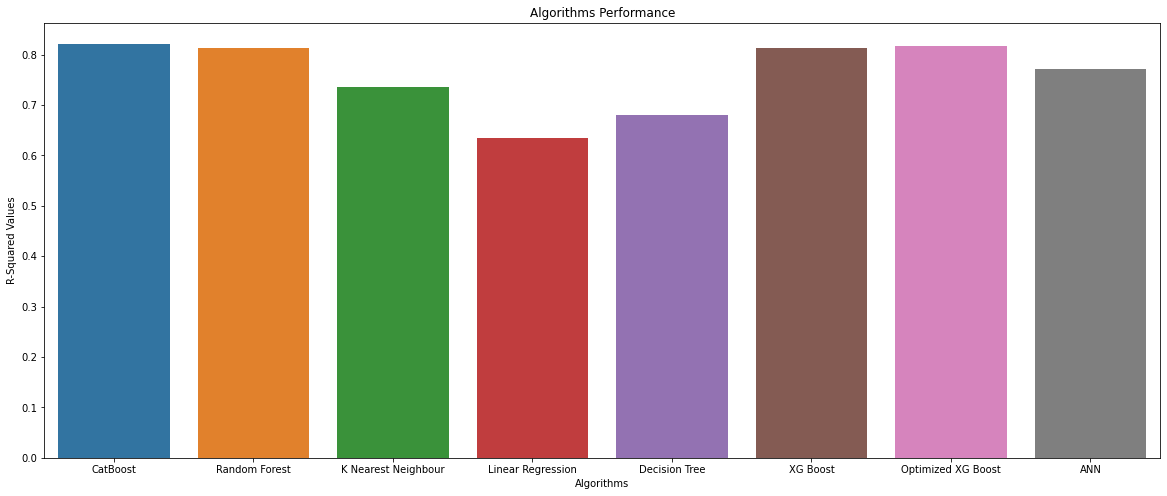

In [63]:
plt.figure(figsize=(20,8))
sns.barplot(x=list(algo_score.keys()), y=list(algo_score.values()))
plt.title("Algorithms Performance")
plt.xlabel("Algorithms")
plt.ylabel("R-Squared Values")
plt.show()

In [64]:
for key, val in algo_score.items():
    print(key, '--->', val)

CatBoost ---> 0.8216
Random Forest ---> 0.8126
K Nearest Neighbour ---> 0.7364
Linear Regression ---> 0.6349
Decision Tree ---> 0.6808
XG Boost ---> 0.8124
Optimized XG Boost ---> 0.8171
ANN ---> 0.7709


In [66]:
maxi = 0
best_algo = ""
for key, val in algo_score.items():
    if val > maxi:
        maxi = val
        best_algo = key
print("Best Performing Algorithm is :-> ", best_algo)
print("R-Squared :-> ", maxi)

Best Performing Algorithm is :->  CatBoost
R-Squared :->  0.8216


## Best performing Model is CatBoost Regressor